# FluPRINT Vaccine Study – Exploratory Analysis

## **Project Context**  
This is the **second part** of the FluPRINT project.  
In **Part 1**, we focused on:
- Data cleaning
- Preprocessing
- Assembling a curated dataset for analysis

## **Purpose of Part 2**  
Here, our goals are to:
- Explore distributions of demographic, clinical, and biological variables.
- Identify potential **biases** (e.g., demographic imbalances, sampling effects).
- Understand variable variability and group differences of the data.
- Gather insights that will help select appropriate **statistical and ML models**.
---

## Step 1 - Lead libraries/dependencies

### Libraries Overview

- **os** – File and path operations.
- **pandas** – Data loading, cleaning, and manipulation.
- **numpy** – Numerical operations and random sampling.
- **seaborn** – Data visualisations.
- **matplotlib.pyplot** – Graph/Charts plotting.
- **string** – String manipulation utilities (used here for feature labelling).
- **matplotlib.cm** – Colormap utilities for custom plot colour schemes.
- **scipy.stats** (`shapiro`, `mannwhitneyu`) – Statistical testing:
    - *Shapiro-Wilk test* for normality checks.
    - *Mann-Whitney U test* for non-parametric comparisons.
- **statsmodels.stats.multitest** (`multipletests`) – Multiple testing correction (e.g., Benjamini-Hochberg FDR).

In [ ]:
# === Imports and Setup ===
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import string
import matplotlib.cm as cm
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

## Step 2 – Load the FluPRINT Dataset

Now that we’ve set up the environment and imported the required libraries,  
we can load our cleaned dataset prepared in **Part 1**.

### Notes:
- This CSV file (`Fluprint_cleaned.csv`) contains the merged and cleaned dataset after removing inconsistencies and handling missing values in Part 1.
- We use `pandas.read_csv()` to load the dataset into a DataFrame.
- The initial `display()` will let us visually confirm:
    - The dataset loaded successfully.
    - The column names and data types are as expected.
    - No obvious corruption of values (e.g., unexpected NaNs or formatting issues).

---

In [ ]:
database = r"C:\Users\Dana\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\Fluprint_cleaned.csv"

# Read the CSV file
fluprint_filtered = pd.read_csv(database)

# Quick check of dataset structure
display(fluprint_filtered)

,donor_id,gender,race,visit_year,visit_age,vaccine,geo_mean,d_geo_mean,name,name_formatted,subset,units,data,vaccine_response,category
0,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,B cells,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40,0.0,Immune Cell
1,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,basophils,basophils,CD123+HLADR-,% of Parent,1.45,0.0,Immune Cell
2,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+ monocytes,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85,0.0,Immune Cell
3,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+CD14+ monocytes,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55,0.0,Immune Cell
4,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+CD14- monocytes,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46,0.0,Immune Cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62616,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,TNFB,TNFB,TNFB,Z.log2,-0.65,0.0,Signaling Molecules
62617,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,TRAIL,TRAIL,TRAIL,Z.log2,-0.63,0.0,Signaling Molecules
62618,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,VCAM1,VCAM1,VCAM1,Z.log2,0.50,0.0,Signaling Molecules
62619,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,VEGF,VEGF,VEGF,Z.log2,1.06,0.0,Signaling Molecules


## Step 3 – Key Variables for Vaccine Response Analysis

In this step, we outline the main variables that define vaccine response and explain their significance.

### Key Variables

- **delta_geo_mean**  
  A *continuous* variable representing the change in geometric mean titers (GMT) of antibodies before and after vaccination.  
  It quantifies the magnitude of immune response by measuring the fold change or difference in antibody levels — a direct biological marker of vaccine efficacy.

- **vaccine_resp**  
  A *categorical* (binary) variable classifying individuals as **high or 1.0** or **low responders or 0.0** based on a 4 fold increase in HAI titre.  

### Why These Matter

- Understanding the distributions of these variables helps when selecting appropriate tests and models — for example, whether parametric assumptions hold or if non-parametric approaches are necessary.
- This step also lays the foundation for understanding how immune and demographic factors correlate with vaccine response.

---

In [ ]:
# Quick overview of these key variables in the loaded dataset
print("Summary statistics for delta_geo_mean:")
display(fluprint_filtered["delta_geo_mean"].describe())

print("\nCounts and distribution for vaccine_resp:")
display(fluprint_filtered["vaccine_resp"].value_counts(normalize=True).rename_axis("vaccine_resp").reset_index(name="proportion"))

### Distribution of Race by Visit Year

We analyse how participants' races are distributed across different visit years. This analysis helps us understand any shifts in demographic composition over time and identify potential cohort effects.

In [ ]:
display(fluprint_filtered.groupby(["race", "visit_age"]).size())

race   visit_age
Asian  8.62          99
       9.01         140
       10.47        140
       11.18         99
       11.84         99
                   ... 
Other  29.62        127
       30.42        127
       30.71        620
       30.72        343
       36.46        140
Length: 225, dtype: int64

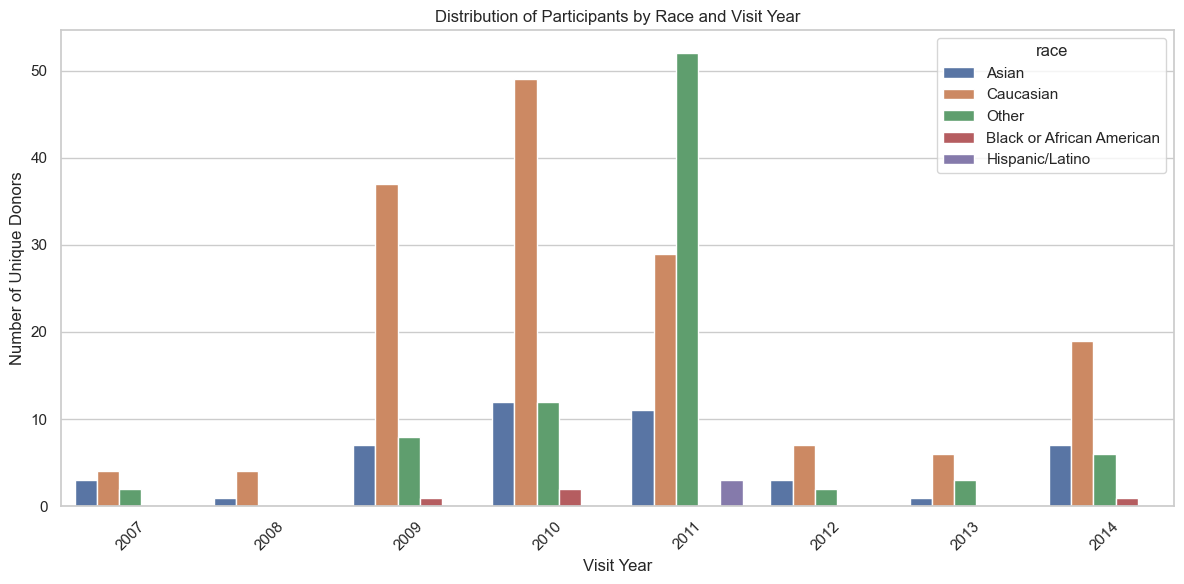

In [ ]:
unique_donors = fluprint_filtered.groupby(["visit_year", "race"])["donor_id"].nunique().reset_index(name="unique_donors")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="visit_year", y="unique_donors", hue="race", data=unique_donors)
plt.title("Distribution of Participants by Race and Visit Year")
plt.xlabel("Visit Year")
plt.ylabel("Number of Unique Donors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender Distribution of Participants

Next, we check the balance between male and female participants to see if gender biases exist in the sample.


Gender Distribution (unique donors):
gender
Female    171
Male      121
Name: donor_id, dtype: int64


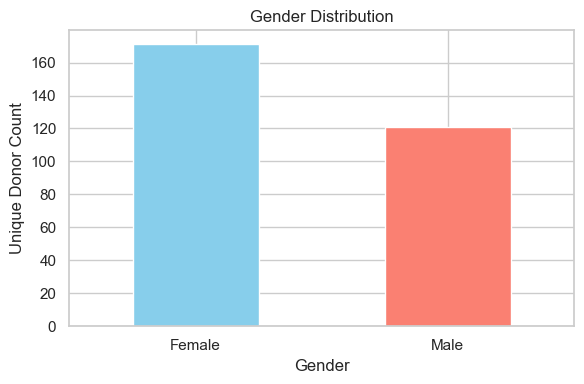

In [ ]:
gender_counts = fluprint_filtered.groupby("gender")["donor_id"].nunique()
print("Gender Distribution (unique donors):")
print(gender_counts)

plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Unique Donor Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Which gender shows higher high responders percentages?

Here we analyse how vaccine response categories (high vs. low responders) are distributed across genders for different vaccine types. Studies indicate that males and females do respond differently to vaccines, with female patients mounting a stronger vaccine response. However we want to calculate the percentage of high vs low responders for each vaccine in order to visualise this difference. Through this we can asses if there are clear gender-related differences (rates), that may suggest sampling biases.

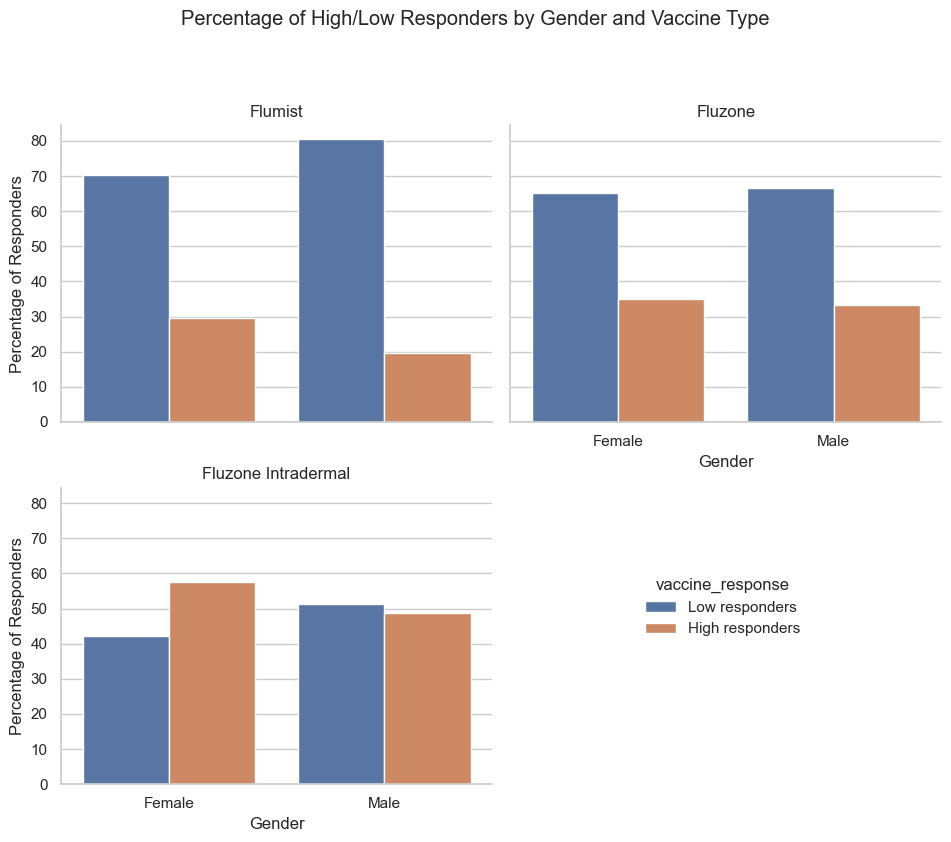

In [ ]:
grouped = fluprint_filtered.groupby(["vaccine", "gender", "vaccine_response"]).size().reset_index(name="count")
total = fluprint_filtered.groupby(["vaccine", "gender"]).size().reset_index(name="total")

# Combine counts and totals, then calculate percentages
merged = pd.merge(grouped, total, on=["vaccine", "gender"])
merged["percent"] = merged["count"] / merged["total"] * 100
merged["vaccine_response"] = merged["vaccine_response"].replace({1.0: "High responders", 0.0: "Low responders"})

# Plot percentages across gender and vaccine types
g = sns.catplot(
    data=merged,
    x="gender", y="percent", hue="vaccine_response",
    col="vaccine", kind="bar", col_wrap=2, height=4
)
g.set_axis_labels("Gender", "Percentage of Responders")
g.set_titles("{col_name}")
sns.move_legend(g, "lower right", bbox_to_anchor=(0.85, 0.25), frameon=False)

plt.suptitle("Percentage of High/Low Responders by Gender and Vaccine Type", y=1.05)
plt.tight_layout()
plt.show()


## Abundance of immune cells, cytokines and chemokines

This step focuses on visualizing the biological features from three major categories:

- **Immune Cells:** Quantitative measures of immune cell populations and subsets.
- **Phosphorylation:** Levels of phospho-proteins indicating activation states.
- **Signaling Molecules:** Cytokines, chemokines, and other soluble factors affecting immune response.

### Objectives:
- Calculate mean levels for each feature stratified by vaccine response (High vs. Low responders).
- Identify top features in each category and visualise the top 10 features per group.
- Prepare groundwork for statistical comparisons between responder groups.

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


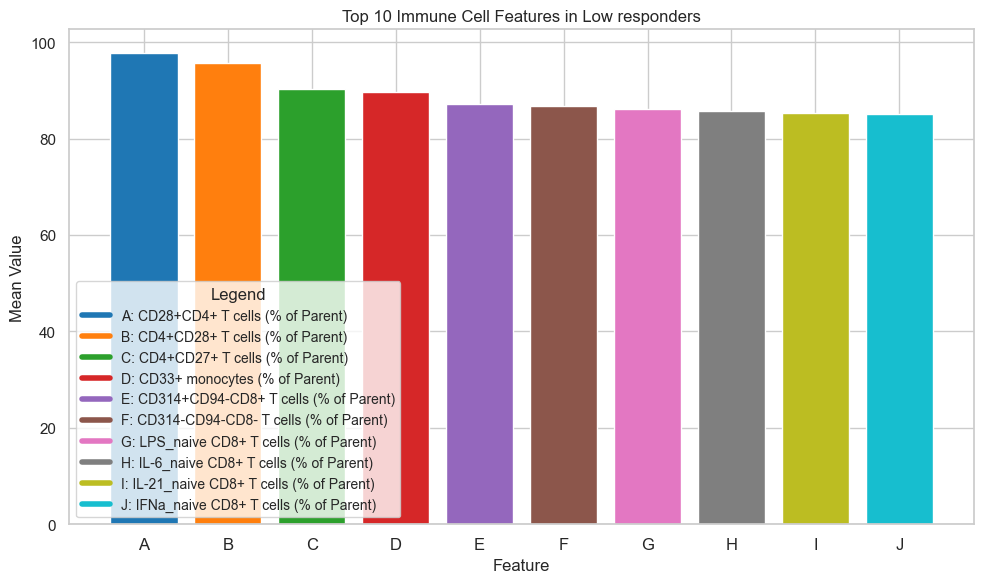

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


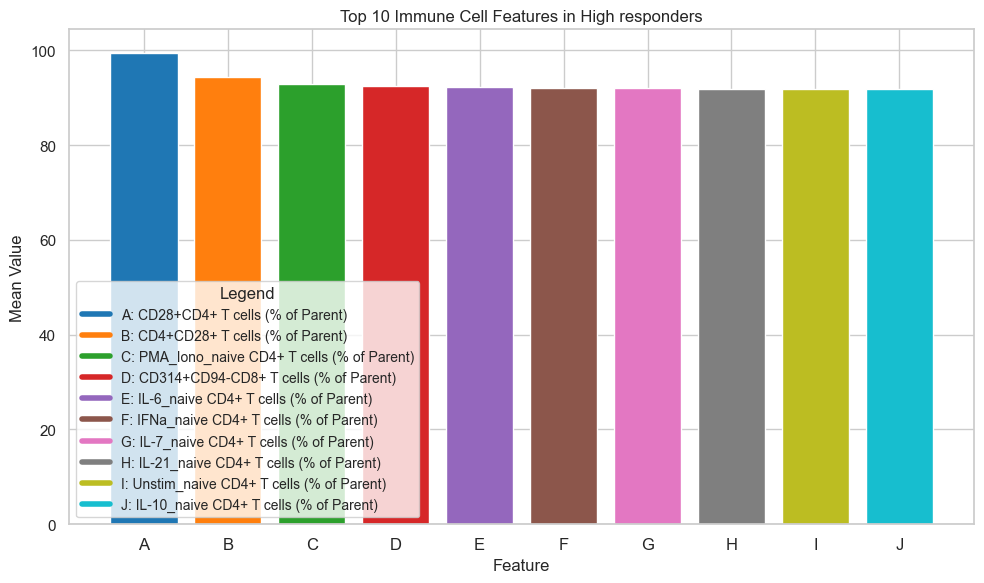

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


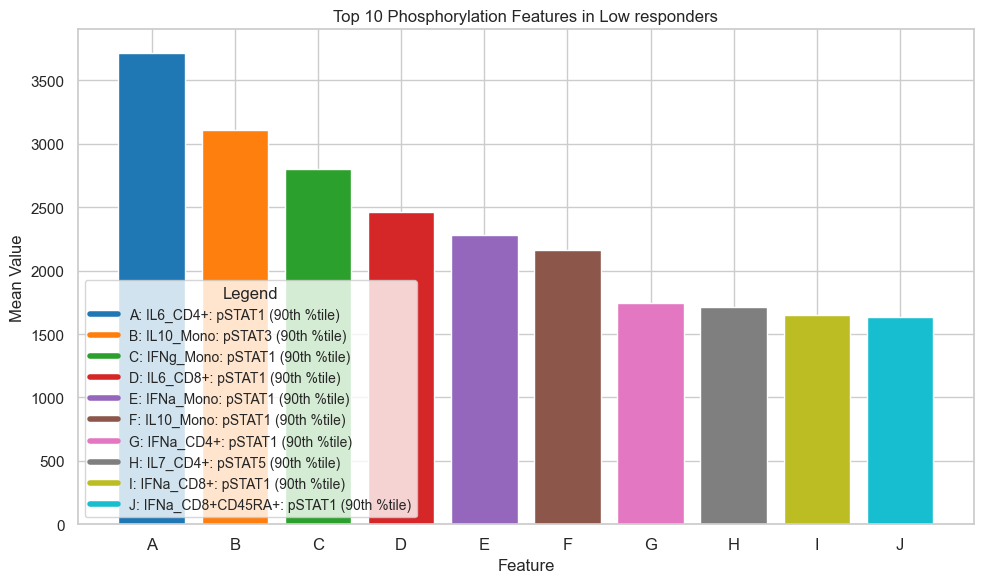

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


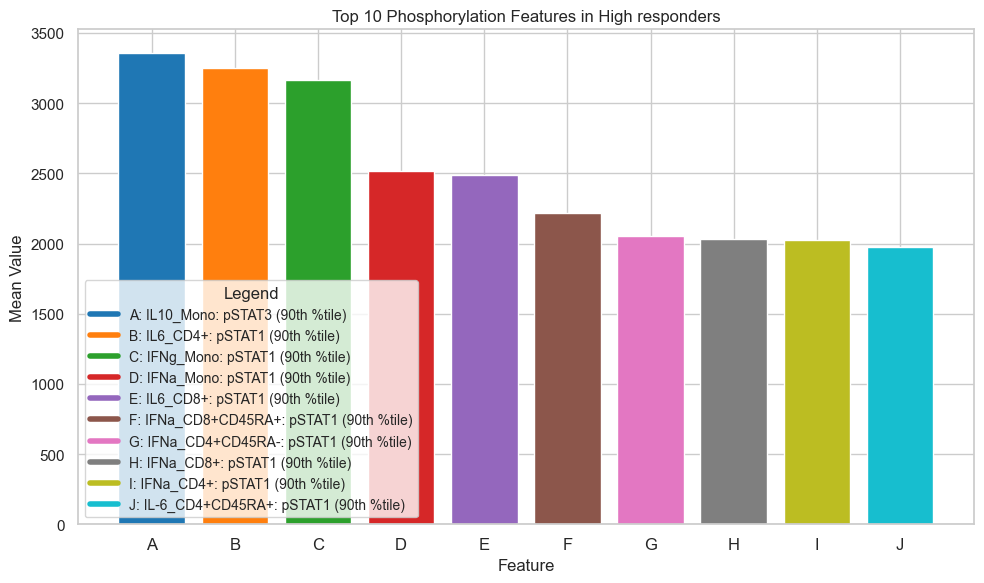

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


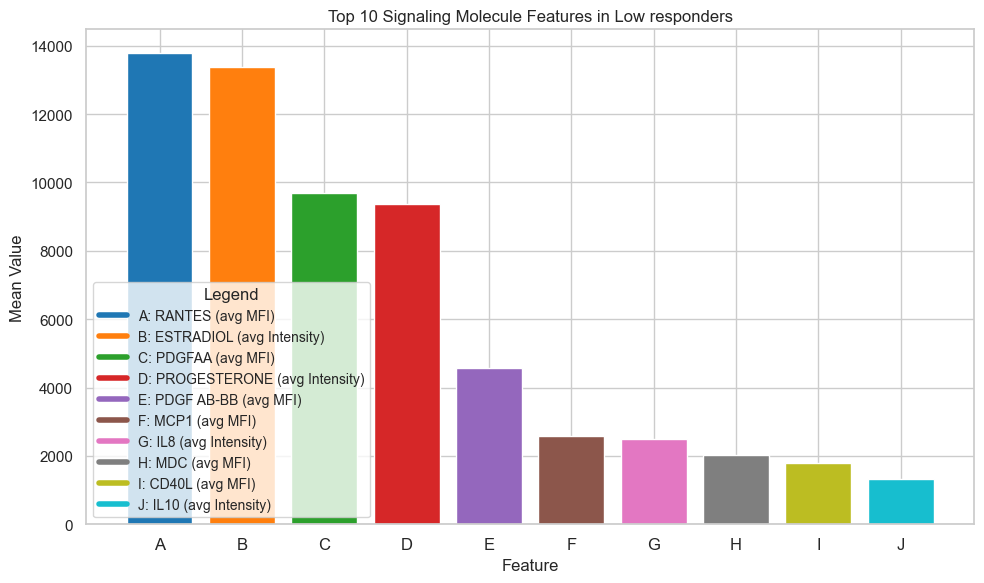

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1084971386.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(subset))  # 'tab10' has 10 distinct colors; use 'tab20' for more


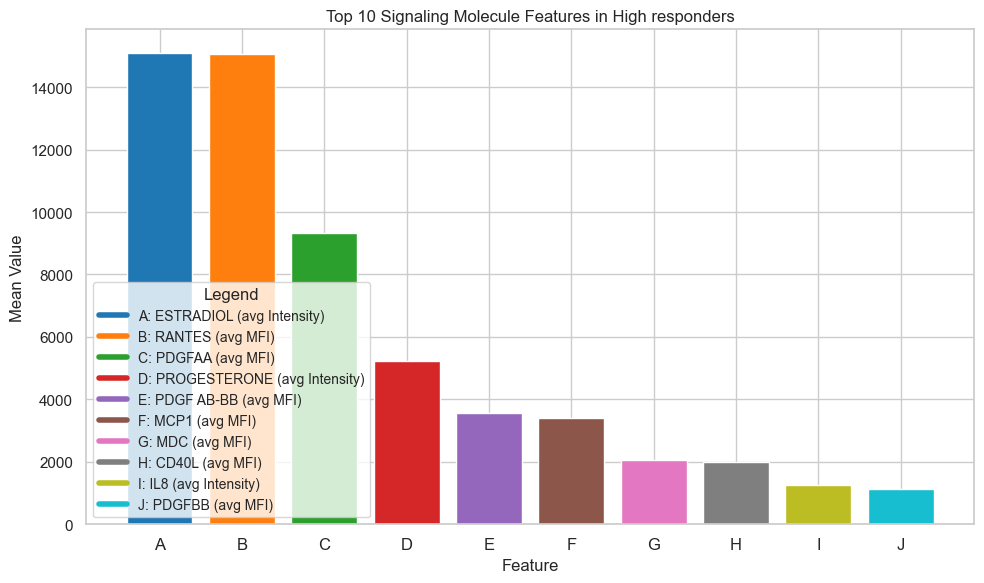

In [ ]:
# Exclude platelet count and cell volume from immune cells as they are abundant but not informative here
exclude_list = ['platelet_ct', 'cell_vol']
immune_cells = fluprint_filtered[
    (fluprint_filtered["category"] == "Immune Cell") &
    (~fluprint_filtered["name_formatted"].str.lower().isin(exclude_list))
]

# Average data by category, response group, name, and units for immune cells
immune_summary = (
    immune_cells.groupby(["category", "vaccine_response", "name", "units"])
    ["data"].mean().reset_index()
)

# Similar summaries for phosphorylation and signaling molecules
phospho = fluprint_filtered[fluprint_filtered["category"] == "Phosphorylation"]
phospho_summary = (
    phospho.groupby(["category", "vaccine_response", "name", "units"])
    ["data"].mean().reset_index()
)

signals = fluprint_filtered[fluprint_filtered["category"] == "Signaling Molecules"]
signals_summary = (
    signals.groupby(["category", "vaccine_response", "name", "units"])
    ["data"].mean().reset_index()
)

def get_top10(df):
    """Select top 10 features by mean value per vaccine response group."""
    top_features = []
    for responder in df["vaccine_response"].unique():
        subset = df[df["vaccine_response"] == responder]
        top10 = subset.nlargest(10, "data")
        top_features.append(top10)
    return pd.concat(top_features)

top_immune = get_top10(immune_summary)
top_phospho = get_top10(phospho_summary)
top_signals = get_top10(signals_summary)

def get_excel_style_labels(n):
    """Generate Excel-style labels (A, B, ... , Z, AA, AB, ...) for plot clarity."""
    labels = []
    for i in range(n):
        label = ""
        temp = i
        while True:
            label = string.ascii_uppercase[temp % 26] + label
            temp = temp // 26 - 1
            if temp < 0:
                break
        labels.append(label)
    return labels

def plot_top_features(df, category_label):
    """Plot top features per vaccine response with concise labels and legend."""
    for responder in df["vaccine_response"].unique():
        subset = df[df["vaccine_response"] == responder].copy()
        subset["feature_with_unit"] = subset["name"] + " (" + subset["units"] + ")"
        subset.reset_index(drop=True, inplace=True)
        subset["short_label"] = get_excel_style_labels(len(subset))
        
        cmap = cm.get_cmap("tab10", len(subset)) 
        colors = [cmap(i) for i in range(len(subset))]

        plt.figure(figsize=(10, 6))
        plt.bar(subset["short_label"], subset["data"], color=colors)

        responder_label = "Low responders" if responder in [0, 0.0] else "High responders"

        plt.title(f"Top 10 {category_label} Features in {responder_label}")
        plt.xlabel("Feature")
        plt.ylabel("Mean Value")
        plt.xticks(fontsize=12)
        plt.tight_layout()

        handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(subset))]
        plt.legend(handles, 
                   [f"{row['short_label']}: {row['feature_with_unit']}" for _, row in subset.iterrows()],
                   loc="lower left", fontsize="small", title="Legend")
        plt.show()

# Generate plots for each category
plot_top_features(top_immune, "Immune Cell")
plot_top_features(top_phospho, "Phosphorylation")
plot_top_features(top_signals, "Signaling Molecule")

## Previous code

C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1592375327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['feature_with_unit'] = subset['name'] + " (" + subset['units'] + ")"
C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1592375327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['feature_with_unit'] = subset['name'] + " (" + subset['units'] + ")"
C:\Users\Dana\AppData\Local\Temp\ipykernel_28512\1592375327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

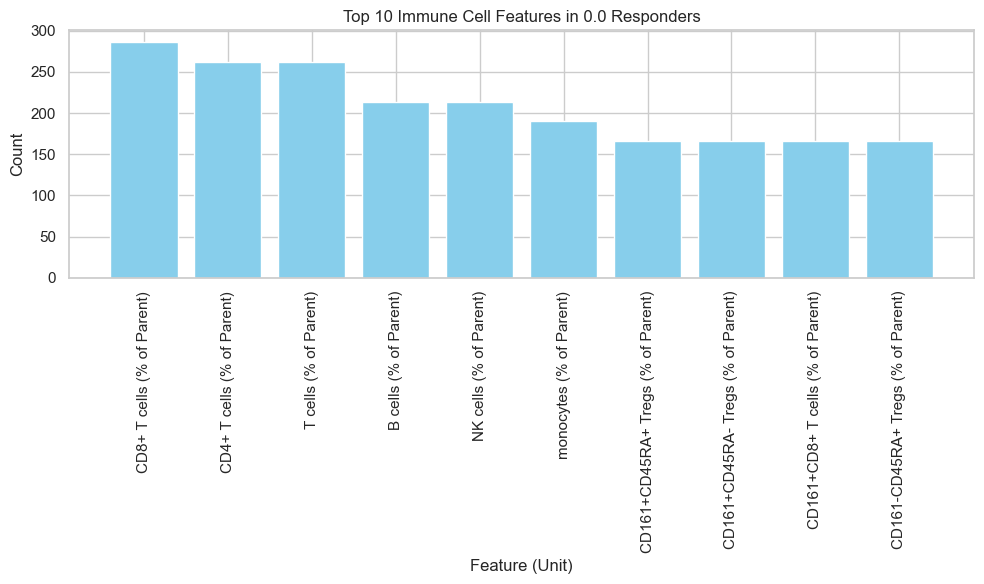

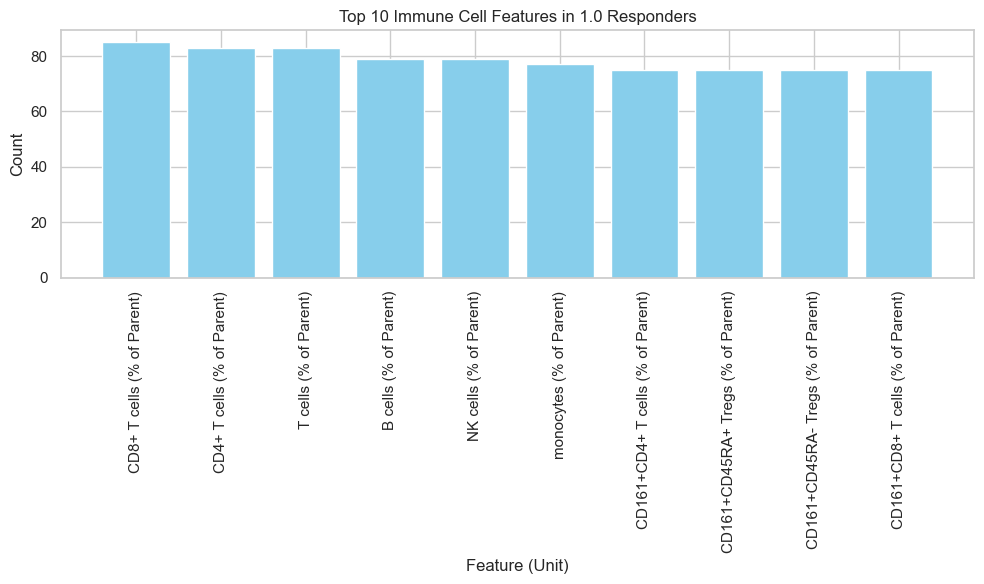

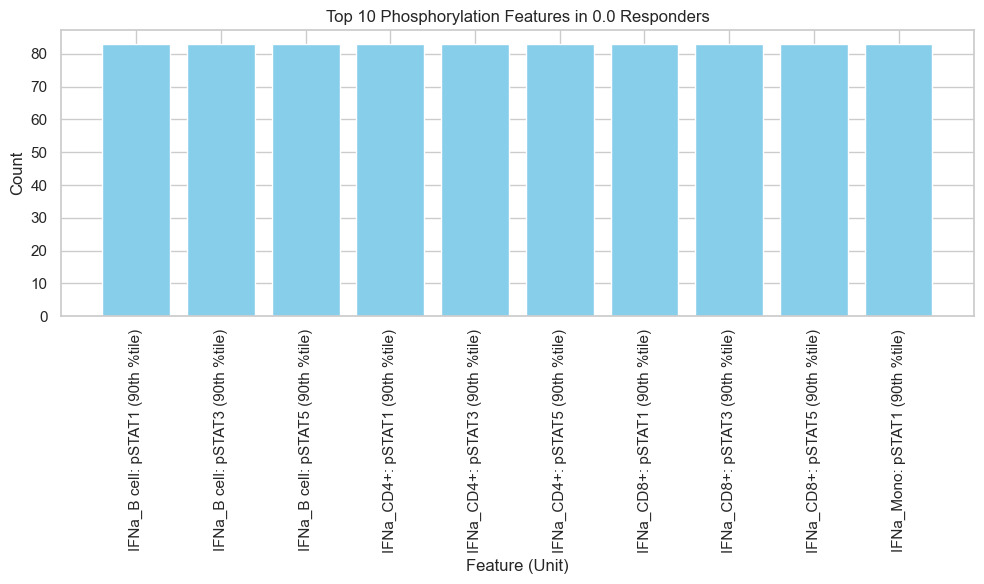

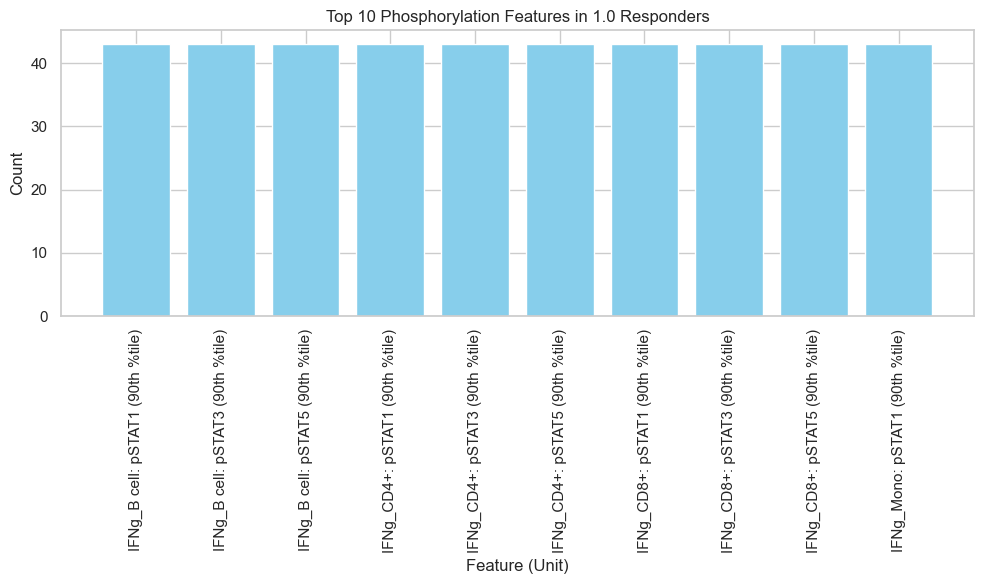

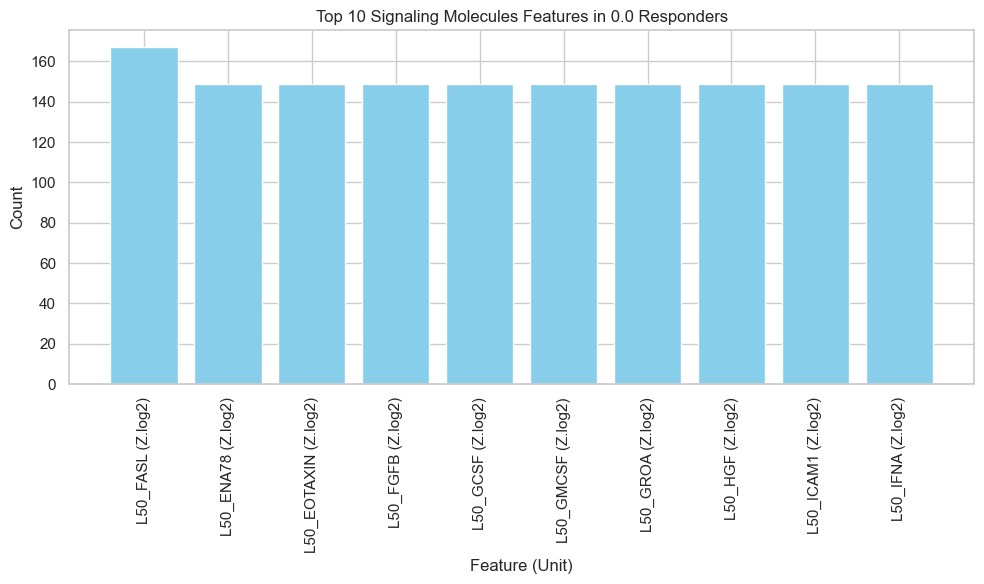

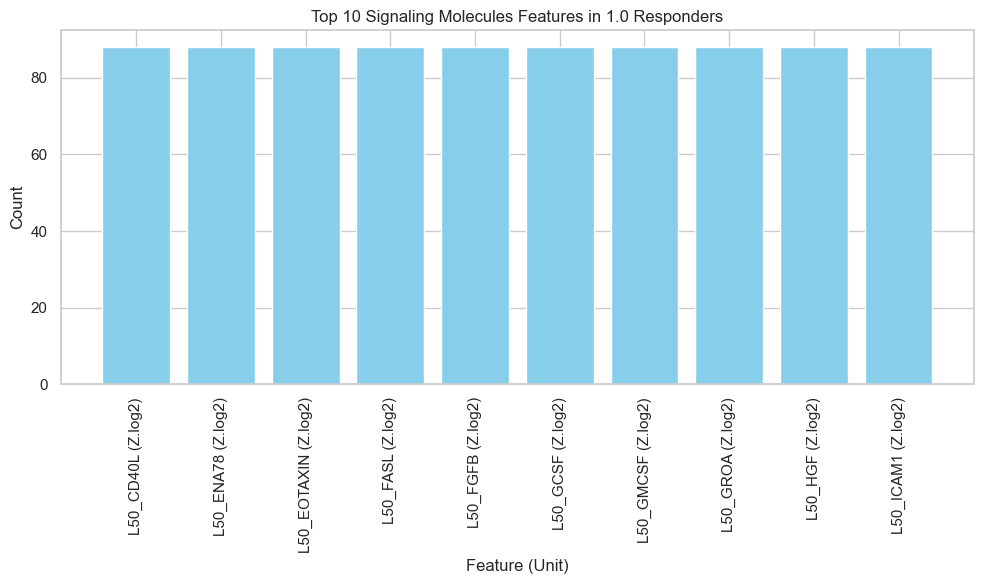

In [18]:
feature_counts = (
    fluprint_filtered
    .groupby(['category', 'vaccine_response', 'name', 'units'])
    .size()
    .reset_index(name='count')
)


top_features = []

for category in feature_counts['category'].unique():
    for responder in feature_counts['vaccine_response'].unique():
        subset = feature_counts[
            (feature_counts['category'] == category) &
            (feature_counts['vaccine_response'] == responder)
        ]
        # Combine name and units for clarity
        subset['feature_with_unit'] = subset['name'] + " (" + subset['units'] + ")"
        top10 = subset.nlargest(10, 'count')
        top_features.append(top10)

top_features_df = pd.concat(top_features)


for category in top_features_df['category'].unique():
    for responder in top_features_df['vaccine_response'].unique():
        plot_data = top_features_df[
            (top_features_df['category'] == category) &
            (top_features_df['vaccine_response'] == responder)
        ]
        plt.figure(figsize=(10, 6))
        plt.bar(plot_data['feature_with_unit'], plot_data['count'], color='skyblue')
        plt.title(f"Top 10 {category} Features in {responder} Responders")
        plt.xlabel('Feature (Unit)')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

## Step 7 – Visualising Distribution of Selected Immune Cell Features

If we want to better understand the spread and distribution of individual immune cell features across vaccine response groups, we randomly select 6 distinct immune cell features and plot their distributions as violin plots. This allows us to inspect whether the data (at random) follows a normal distribution (bell-shaped curve) or are skewed or irregular. 

For example:  
- **Linear regression and other parametric models** often assume roughly normal (Gaussian) distributions or residuals.  
- **Clinical and biological data** frequently violate this assumption, making parametric tests inappropriate.  
- **Non-parametric tests** (such as Mann-Whitney U) and **tree-based models** (e.g., Random Forest) can better handle skewed or irregular data without normality assumptions.


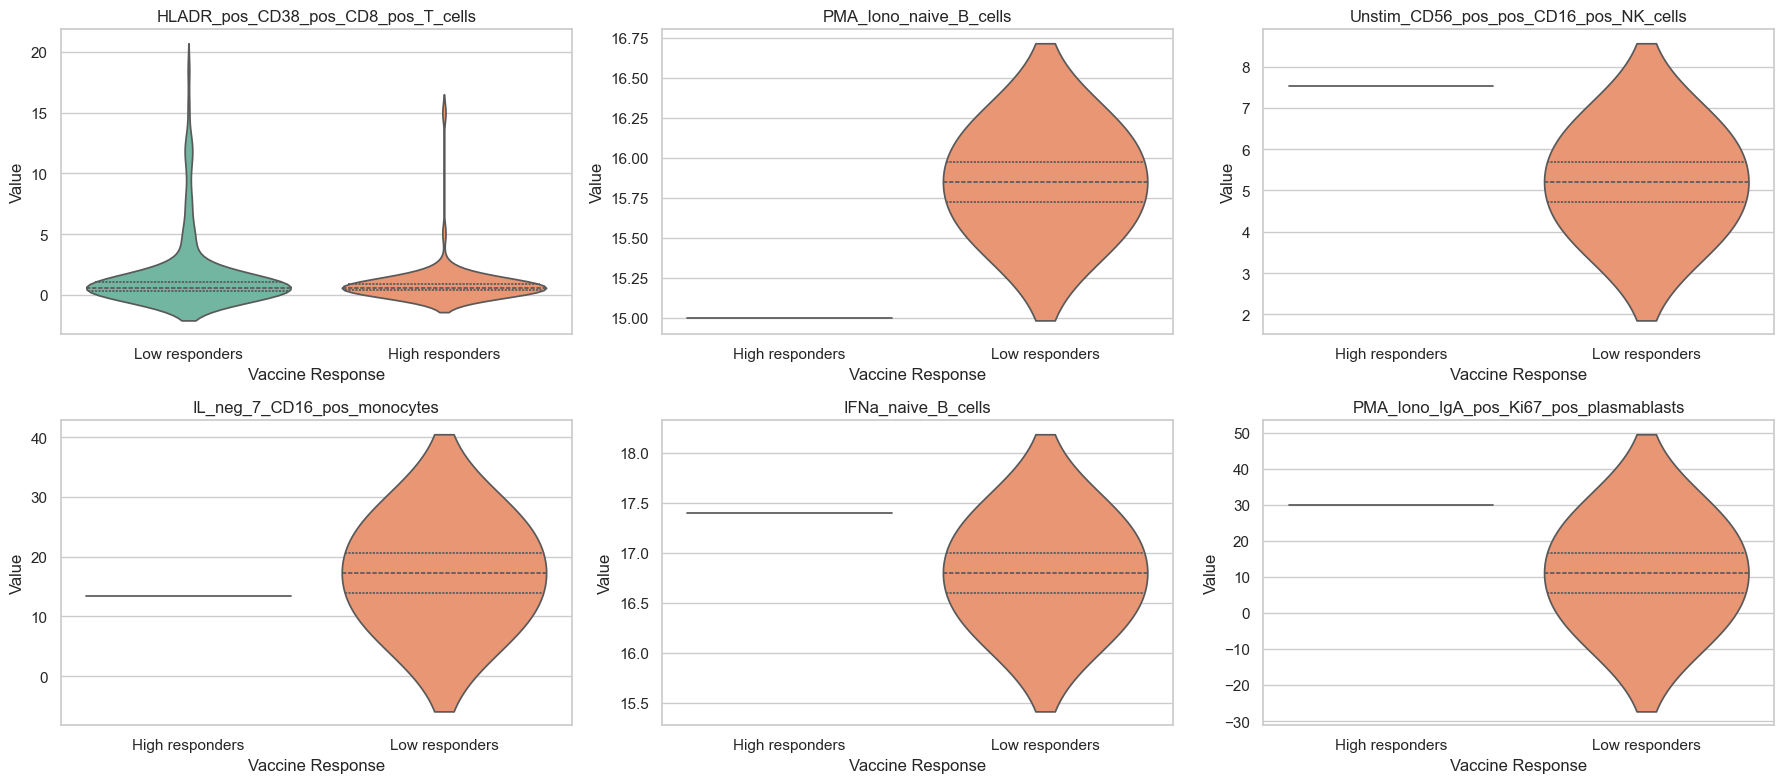

In [ ]:
# Filter immune cell data
immune_cells = fluprint_filtered[fluprint_filtered["category"] == "Immune Cell"]

# Randomly select 6 unique features for plotting
random_features = np.random.choice(
    immune_cells["name_formatted"].unique(), size=6, replace=False
)

# Set up 2x3 subplots for individual feature violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=False)
axes = axes.flatten()

# Plot violin plots for each selected feature
for ax, feature in zip(axes, random_features):
    feature_data = immune_cells[immune_cells["name_formatted"] == feature].copy()
    feature_data["vaccine_response"] = feature_data["vaccine_response"].replace({
        0.0: "Low responders",
        1.0: "High responders"
    })
    sns.violinplot(
        x="vaccine_response",
        y="data",
        hue="vaccine_response",
        data=feature_data,
        inner="quartile",
        palette="Set2",
        ax=ax,
        legend=False
    )
    ax.set_title(feature)
    ax.set_xlabel("Vaccine Response")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

Given the data is **not normally distributed** and we want to compare **two independent groups** (high vs. low responders), we will use the **Mann-Whitney U test** (also called Wilcoxon rank-sum test) to tests whether the distributions of the two groups are significantly different (not just the means).

---

In [ ]:
def all_significant_features(
    df,
    category,
    feature_col="name_formatted",
    value_col="data",
    group_col="vaccine_response",
    group0=0.0,
    group1=1.0,
    alpha=0.05,
):
    """
    Perform Mann-Whitney U tests for each feature within a category, comparing two response groups.
    Returns a DataFrame of statistics and p-values, printing a summary of significant features.
    """
    df_cat = df[df["category"] == category]
    results = []
    for feature in df_cat[feature_col].unique():
        subset = df_cat[df_cat[feature_col] == feature]
        group_a = subset[subset[group_col] == group0][value_col]
        group_b = subset[subset[group_col] == group1][value_col]
        if len(group_a) > 0 and len(group_b) > 0:
            try:
                stat, p = mannwhitneyu(group_a, group_b, alternative="two-sided")
                results.append({"feature": feature, "statistic": stat, "p_value": p})
            except ValueError:
                # Skip features where test fails due to identical values or other issues
                continue
    results_df = pd.DataFrame(results)
    if results_df.empty:
        print(f"No features with sufficient data in category '{category}'.")
        return results_df

    sig_count = (results_df["p_value"] < alpha).sum()
    total = len(results_df)
    print(f"{sig_count} out of {total} features in '{category}' are significant at p < {alpha}.")
    return results_df


immune_results = all_significant_features(fluprint_filtered, "Immune Cell")
phospho_results = all_significant_features(fluprint_filtered, "Phosphorylation")
signals_results = all_significant_features(fluprint_filtered, "Signaling Molecules")


19 out of 430 features in 'Immune Cell' are significant at p < 0.05.
65 out of 2685 features in 'Phosphorylation' are significant at p < 0.05.
4 out of 128 features in 'Signaling Molecules' are significant at p < 0.05.


---
The results indicate that only a small proportions show a statistically significant difference in their values between high and low vaccine responders. For example, 19 out of 430 immune cell features (approximately 4.4%) exhibit a potential association with vaccine response.

However a caveat to this is that when a large number of tests are calculated, the rate of false positives—features that appear significant purely by chance does increase. It is important to apply multiple testing correction methods (e.g., False Discovery Rate) to better control for these false discoveries and improve the reliability of your conclusions.

In [ ]:
def all_significant_features(
    df, 
    category, 
    feature_col="name_formatted", 
    value_col="data", 
    group_col="vaccine_response", 
    group0=0.0, 
    group1=1.0, 
    alpha=0.05,
    correction_method="fdr_bh"
):
    """
    Performs Mann-Whitney U tests for each feature in a category,
    correcting p-values for multiple testing. Prints counts of significant features
    for both raw and adjusted p-values.
    """
    df_cat = df[df["category"] == category]
    results = []
    
    for feature in df_cat[feature_col].unique():
        subset = df_cat[df_cat[feature_col] == feature]
        group_a = subset[subset[group_col] == group0][value_col]
        group_b = subset[subset[group_col] == group1][value_col]
        
        if len(group_a) > 0 and len(group_b) > 0:
            try:
                stat, p = mannwhitneyu(group_a, group_b, alternative="two-sided")
                results.append({"feature": feature, "statistic": stat, "p_value": p})
            except ValueError:
                # Skip features with identical values causing test failure
                continue
    
    results_df = pd.DataFrame(results)
    
    if results_df.empty:
        print(f"No features with sufficient data to test in category '{category}'.")
        return results_df
    
    results_df = results_df.sort_values(by="p_value").reset_index(drop=True)
    
    # Correct for multiple testing using selected method
    reject, pvals_corrected, _, _ = multipletests(
        results_df["p_value"], alpha=alpha, method=correction_method
    )
    results_df["p_adj"] = pvals_corrected
    
    # Summary counts
    sig_count_raw = (results_df["p_value"] < alpha).sum()
    sig_count_adj = (results_df["p_adj"] < alpha).sum()
    total_tested = len(results_df)
    
    print(f"\n--- Results for '{category}' ---")
    print(f"Total features tested: {total_tested}")
    print(f"Significant at raw p < {alpha}: {sig_count_raw} ({sig_count_raw/total_tested:.2%})")
    print(f"Significant at adjusted p ({correction_method}) < {alpha}: {sig_count_adj} ({sig_count_adj/total_tested:.2%})")
    
    return results_df


immune_results_df = all_significant_features(fluprint_filtered, "Immune Cell")
phospho_results_df = all_significant_features(fluprint_filtered, "Phosphorylation")
signals_results_df = all_significant_features(fluprint_filtered, "Signaling Molecules")


# Display the top 10 results by raw p-value
print("\nImmune Cell Results (top 10 by raw p-value):")
display(immune_results_df.head(10))

print("\nPhosphorylation Results (top 10 by raw p-value):")
display(phospho_results_df.head(10))

print("\nSignaling Molecules Results (top 10 by raw p-value):")
display(signals_results_df.head(10))


--- Results for 'Immune Cell' ---
Total features tested: 430
Significant at raw p < 0.05: 19 features (4.42% of tested)
Significant at adjusted p (fdr_bh) < 0.05: 8 features (1.86% of tested)

--- Results for 'Phosphorylation' ---
Total features tested: 2685
Significant at raw p < 0.05: 65 features (2.42% of tested)
Significant at adjusted p (fdr_bh) < 0.05: 19 features (0.71% of tested)

--- Results for 'Signaling Molecules' ---
Total features tested: 128
Significant at raw p < 0.05: 4 features (3.12% of tested)
Significant at adjusted p (fdr_bh) < 0.05: 0 features (0.00% of tested)

Immune Cell Results (top 10 by raw p-value):


,feature,statistic,p_value,p_adj
0,CD85j_pos_CD4_pos_T_cells,3857.0,0.000002,0.000640
1,CD161_pos_CD45RA_pos_Tregs,3901.5,0.000003,0.000640
2,CD16_pos_CD14_pos_monocytes,706.5,0.000012,0.001732
3,Th2_non_neg_TFH_CD8_pos_T_cells,742.0,0.000032,0.003433
4,Th2_TFH_CD8_pos_T_cells,755.0,0.000045,0.003682
5,pDCs,2087.0,0.000051,0.003682
6,TFH_CD8_pos_T_cells,805.0,0.000160,0.009852
7,Th1_non_neg_TFH_CD8_pos_T_cells,2026.5,0.000233,0.012544
8,Th1_TFH_CD8_pos_T_cells,1952.0,0.001261,0.060235
9,Th17_TFH_CD8_pos_T_cells,900.5,0.001408,0.060528



Phosphorylation Results (top 10 by raw p-value):


,feature,statistic,p_value,p_adj
0,IL_neg_10_Mono_pSTAT1,748.0,0.000027,0.025153
1,IL_neg_21_Mono_pSTAT1,749.0,0.000028,0.025153
2,Unstim_B_cell_pSTAT1,996.5,0.000051,0.025153
3,IL_neg_10_CD4_pos_CD45RA_neg_pSTAT1,786.0,0.000072,0.025153
4,IL_neg_10_CD8_pos_CD45RA_neg_pSTAT1,786.5,0.000073,0.025153
5,IL_neg_10_CD8_pos_pSTAT1,786.5,0.000073,0.025153
6,IL_neg_10_CD4_pos_pSTAT1,792.5,0.000085,0.025153
7,IL_neg_6_Mono_pSTAT1,793.0,0.000086,0.025153
8,Unstim_CD8_pos_CD45RA_neg_pSTAT1,796.5,0.000094,0.025153
9,IL_neg_10_CD4_pos_CD45RA_pos_pSTAT1,797.0,0.000096,0.025153



Signaling Molecules Results (top 10 by raw p-value):


,feature,statistic,p_value,p_adj
0,L50_LEPTIN,5329.5,0.016209,0.706727
1,L50_HGF,5362.5,0.019310,0.706727
2,RANTES,59.0,0.024540,0.706727
3,L50_GMCSF,5535.0,0.045370,0.706727
4,VEGF,72.5,0.062633,0.706727
5,LEPTIN,72.5,0.062633,0.706727
6,MCSF,20.5,0.062902,0.706727
7,MIP1B,74.0,0.068927,0.706727
8,CD40L,75.0,0.073431,0.706727
9,IL1A,76.0,0.078128,0.706727


In [ ]:
def filtered_significant_features(
    df, 
    category, 
    feature_col="name_formatted", 
    value_col="data", 
    group_col="vaccine_response", 
    group0=0.0, 
    group1=1.0, 
    alpha=0.05,
    correction_method="fdr_bh",
    p_adj_cutoff=0.1
):

    # Perform statistical testing with correction
    results_df = all_significant_features(
        df, category, feature_col, value_col, group_col, group0, group1, alpha, correction_method
    )
    
    # Select features passing the adjusted p-value cutoff
    filtered_df = results_df[results_df["p_adj"] < p_adj_cutoff].copy()
    
    print(f"Filtered to {len(filtered_df)} features with adjusted p-value < {p_adj_cutoff}")
    return filtered_df


filtered_df = filtered_significant_features(fluprint_filtered, "Immune Cell")
print(f"Number of features left after filtering: {len(filtered_df)}")


--- Results for 'Immune Cell' ---
Total features tested: 430
Significant at raw p < 0.05: 19 features (4.42% of tested)
Significant at adjusted p (fdr_bh) < 0.05: 8 features (1.86% of tested)
Filtered to 10 features with adjusted p-value < 0.1
Number of features left after filtering: 10
